## Setup evnironment

In [1]:
import os
import numpy as np
import pandas as pd
import json
from skimage.io import imread

In [2]:
from psf import compute, plotPSF

## Setup plotting

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper', font_scale=2.0)
sns.set_style('ticks')

In [155]:
from ipywidgets import interactive, interact
from ipywidgets import IntSlider
from IPython.display import display

## Define parameters

In [5]:
# Full FOV
FOVpxLat = 2048.0 # 2048
UmPerPxLat = 1.6
pxPerUmLat = 1/UmPerPxLat
FOVumLat = FOVpxLat / pxPerUmLat
pxPerUmAx = 1.0 # 1.0
windowUm = [12, 10, 10]
options = {'FOVumLat':FOVumLat, 'FOVpxLat':FOVpxLat, 'pxPerUmLat':FOVpxLat/FOVumLat, 'pxPerUmAx':pxPerUmAx, 'windowUm':windowUm}
options['thresh'] = .05

In [6]:
# 1/4 FOV
FOVpxLat = 512.0 # 2048
UmPerPxLat = 1.6
pxPerUmLat = 1/UmPerPxLat
FOVumLat = FOVpxLat / pxPerUmLat
pxPerUmAx = 1.0 # 1.0
windowUm = [20, 10, 10]
options = {'FOVumLat':FOVumLat, 'FOVpxLat':FOVpxLat, 'pxPerUmLat':FOVpxLat/FOVumLat, 'pxPerUmAx':pxPerUmAx, 'windowUm':windowUm}
options['thresh'] = .05

In [7]:
options

{'FOVumLat': 819.2,
 'FOVpxLat': 512.0,
 'pxPerUmLat': 0.625,
 'pxPerUmAx': 1.0,
 'windowUm': [20, 10, 10],
 'thresh': 0.05}

## Get PSF

In [ ]:
im = imread('./data/images.tif', plugin='tifffile') # old testdata

In [8]:
im = imread('./data/test2-withETL.tif', plugin='tifffile') # 512 px testdata

In [50]:
im = imread('./data/5ms_2nd_488_nm_508_520-35_4x_Right_000000-3-200slices.tif', plugin='tifffile')  # 2048 px testdata

In [21]:
im = imread('./data/5ms_2nd_noETL_488_nm_508_520-35_4x_Right_000000-2-200slices.tif', plugin='tifffile')  # 2048 px testdata

In [9]:
data, beads, maxima, centers, smoothed = compute(im, options)

In [39]:
centers = pd.DataFrame(centers, columns=['Z','Y','X'])

In [164]:
PSF = pd.concat([x[0] for x in data])
PSF['Max'] = maxima
PSF = PSF.reset_index().drop(['index'],axis=1)
latProfile = [x[1] for x in data]
axProfile = [x[2] for x in data]
PSF = PSF.join(centers)

In [165]:
PSF.head()

,FWHMlat,FWHMax,Max,Z,Y,X
0,2.760149,4.686538,7744,180,359,435
1,2.667516,5.040638,7987,180,63,305
2,2.765537,7.741789,6217,179,446,162
3,2.623914,5.466305,7339,178,216,78
4,2.535668,5.625341,8146,178,64,283


In [68]:
print('# PSFs: ', len(PSF))
print('Mean lateral FWHM: ', round(PSF['FWHMlat'].mean(),3))
print('STD lateral FWHM: ', round(PSF['FWHMlat'].std(),3))
print('Mean axial FWHM: ', round(PSF['FWHMax'].mean(),3))
print('STD axial FWHM: ', round(PSF['FWHMax'].std(),3))

# PSFs:  75
Mean lateral FWHM:  2.763
STD lateral FWHM:  0.162
Mean axial FWHM:  5.884
STD axial FWHM:  1.152


## Plot max projection

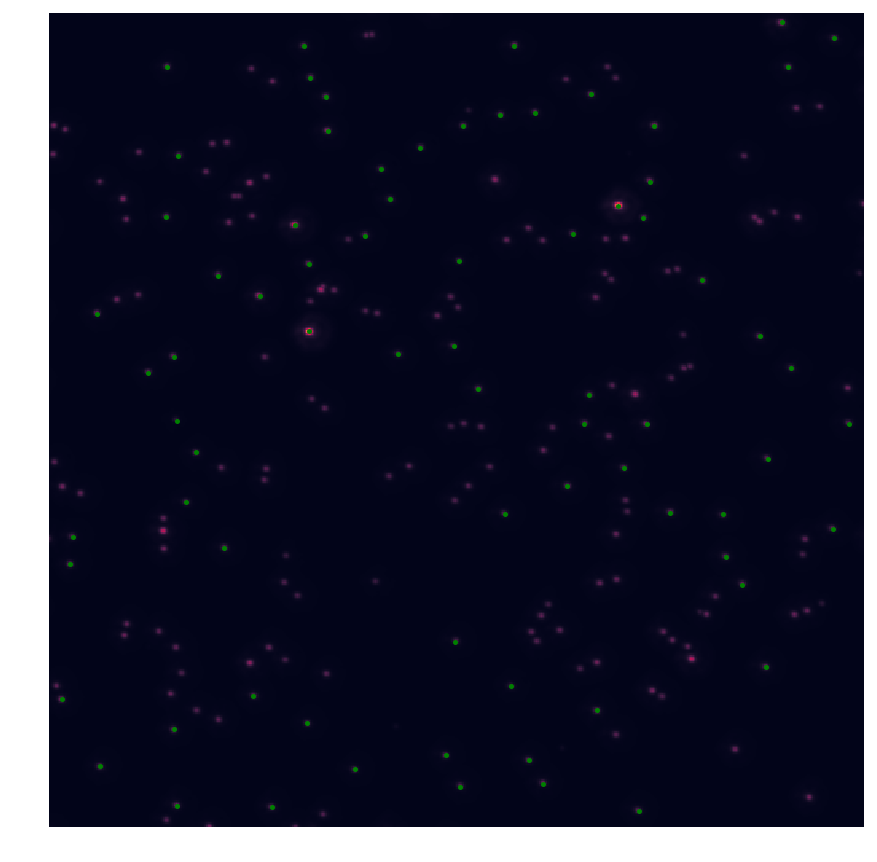

In [86]:
plt.figure(figsize=(15,15));
plt.imshow(smoothed);
plt.plot(PSF['X'].tolist(), PSF['Y'].tolist(), 'g.', ms=10);
plt.xlim([0, smoothed.shape[0]])
plt.ylim([smoothed.shape[1], 0])
plt.axis('off');

## Plot axial FWHM vs. FOV

Text(0,0.5,'Axial FWHM (μm)')

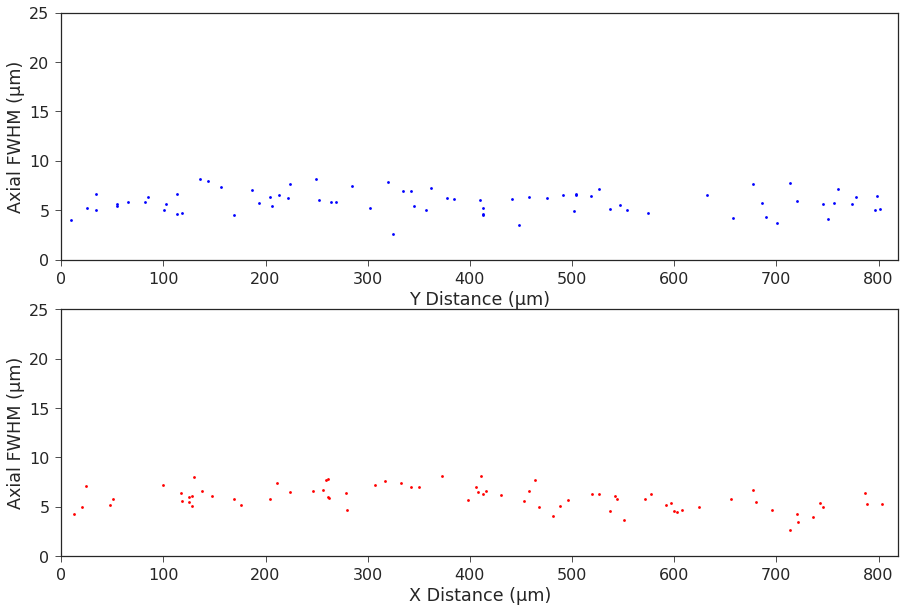

In [112]:
%matplotlib inline
fig = plt.figure(figsize=(15,10));

subfigure0 = fig.add_subplot(211)
subfigure0.plot(np.multiply(PSF['Y'].tolist(),UmPerPxLat),PSF['FWHMax'].tolist(),'.b')
subfigure0.set_xlim([0,options['FOVumLat']])
subfigure0.set_ylim([0,25])
subfigure0.set_xlabel('Y Distance (μm)')
subfigure0.set_ylabel('Axial FWHM (μm)')

subfigure1 = fig.add_subplot(212)
subfigure1.plot(np.multiply(PSF['X'].tolist(),UmPerPxLat),PSF['FWHMax'].tolist(),'.r')
subfigure1.set_xlim([0,options['FOVumLat']])
subfigure1.set_ylim([0,25])
subfigure1.set_xlabel('X Distance (μm)')
subfigure1.set_ylabel('Axial FWHM (μm)')

## Overview Plots

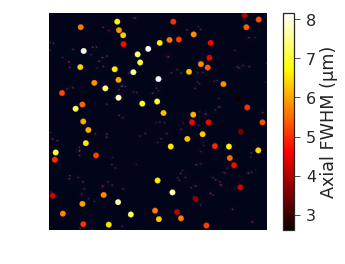

In [132]:
#plt.figure(figsize=(15,15));
plt.imshow(smoothed);
plt.scatter(PSF['X'].tolist(), PSF['Y'].tolist(), c=PSF['FWHMax'].tolist(), cmap='hot');
cbar = plt.colorbar()
cbar.set_label('Axial FWHM (μm)')
plt.xlim([0, smoothed.shape[0]])
plt.ylim([smoothed.shape[1], 0])
plt.axis('off'); 

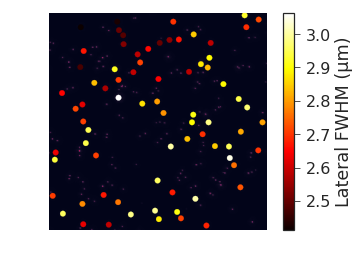

In [134]:
#plt.figure(figsize=(15,15));
plt.imshow(smoothed);
plt.scatter(PSF['X'].tolist(), PSF['Y'].tolist(), c=PSF['FWHMlat'].tolist(), cmap='hot');
cbar = plt.colorbar()
cbar.set_label('Lateral FWHM (μm)')
plt.xlim([0, smoothed.shape[0]])
plt.ylim([smoothed.shape[1], 0])
plt.axis('off'); 

## Plot max projection

<Figure size 1080x720 with 0 Axes>

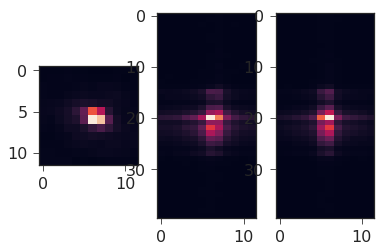

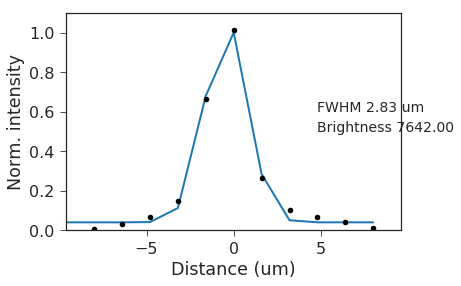

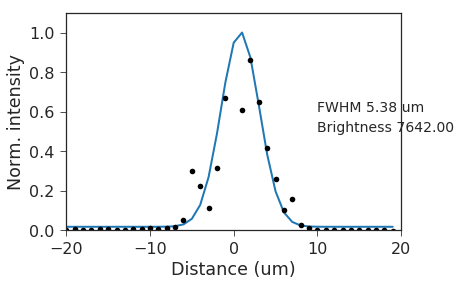

In [167]:
beadInd = 62
average = beads[beadInd]

fig = plt.figure(figsize=(15,10))

fig, _axs = plt.subplots(nrows=1, ncols=3)
axs = _axs.flatten()

XYview = axs[0].imshow(average.mean(axis=0));
XZview = axs[1].imshow(average.mean(axis=1), aspect = pxPerUmLat/pxPerUmAx);
YZview = axs[2].imshow(average.mean(axis=2), aspect = pxPerUmLat/pxPerUmAx);
plt.show()

plotPSF(latProfile[beadInd][0],latProfile[beadInd][1],latProfile[beadInd][2],latProfile[beadInd][3],pxPerUmLat,PSF.Max.iloc[beadInd])
plt.show()
plotPSF(axProfile[beadInd][0],axProfile[beadInd][1],axProfile[beadInd][2],axProfile[beadInd][3],pxPerUmAx,PSF.Max.iloc[beadInd])
plt.show()

In [168]:
fig = plt.figure(figsize=(15,10))

def update(w = 50):
    beadInd = w
    average = beads[beadInd]
    
    fig, _axs = plt.subplots(nrows=1, ncols=3)
    axs = _axs.flatten()

    XYview = axs[0].imshow(average.mean(axis=0));
    XZview = axs[1].imshow(average.mean(axis=1), aspect = pxPerUmLat/pxPerUmAx);
    YZview = axs[2].imshow(average.mean(axis=2), aspect = pxPerUmLat/pxPerUmAx);
    plt.show()
    plotPSF(latProfile[beadInd][0],latProfile[beadInd][1],latProfile[beadInd][2],latProfile[beadInd][3],pxPerUmLat,PSF.Max.iloc[beadInd])
    plt.show()
    plotPSF(axProfile[beadInd][0],axProfile[beadInd][1],axProfile[beadInd][2],axProfile[beadInd][3],pxPerUmAx,PSF.Max.iloc[beadInd])
    plt.show()

interact(update)

<Figure size 1080x720 with 0 Axes>

interactive(children=(IntSlider(value=50, description='w', max=150, min=-50), Output()), _dom_classes=('widget…

<function __main__.update(w=50)>